<a href="https://colab.research.google.com/github/juancaalcaraz/practicaML/blob/main/practicando_DS_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df_wine= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header=None)

In [2]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash','Alcalinnity of ash', 'magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoids phenols', 'Proanthocyanins', 'color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'proline']

In [3]:
#distintos clases de etiquetas
import numpy as np
print('Valor de las etiquetas de clase', np.unique(df_wine['Class label']))

Valor de las etiquetas de clase [1 2 3]


In [4]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinnity of ash,magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanins,color intensity,Hue,OD280/OD315 of diluted wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
#Comprobando valores nulos
df_wine.isnull().sum()

Class label                     0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinnity of ash              0
magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoids phenols           0
Proanthocyanins                 0
color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
proline                         0
dtype: int64

In [6]:
#representación por etiquetas
df_wine['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [7]:
#subdividir el dataframe en datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0, stratify=y)

In [8]:
#vamos a estandarizar los datos
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train_std = standardScaler.fit_transform(X_train)
X_test_std = standardScaler.transform(X_test)


In [9]:
#probando coon penalizacón L1
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(penalty='l1', C=1.0, solver='saga')
lg.fit(X_train_std, y_train)
print("exactitud del entrenamiento", lg.score(X_train_std, y_train))
print("exactitud del testeo", lg.score(X_test_std, y_test))

exactitud del entrenamiento 1.0
exactitud del testeo 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [10]:
#Accediendo a las terminos de intercepcion
lg.intercept_

array([ 0.42599967,  0.60207287, -1.02807254])

In [11]:
#coeficientes del modelo.
lg.coef_

array([[ 0.32483199,  0.        ,  0.        , -0.74989308,  0.        ,
         0.        ,  0.34277082,  0.        ,  0.        ,  0.        ,
         0.        ,  0.2634617 ,  0.98605703],
       [-1.28355376, -0.36228392, -0.91112503,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.09577948,
         0.49702501,  0.        , -1.41168929],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.05178162,  0.        ,  0.        ,  0.22303622,
        -0.61773674, -0.96004722,  0.        ]])

### La matriz de pesos a la cual hemos accedido mediante el atributo coef_ contiene tres filas de coeficientes de pesos, un vector de peso para cada clase. Cada fila consiste de 13 pesos donde cada uno esta multiplicado por la correspondiente caracteristica e el conjunto de datos wine de 13 dimensiones para calcular la entrada neta.

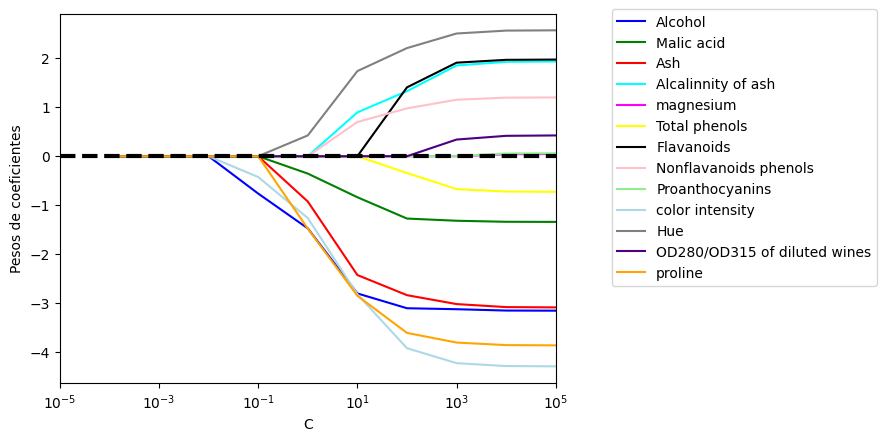

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors =["blue", "green", "red", "cyan",
         "magenta","yellow", "black", "pink",
         "lightgreen","lightblue","gray","indigo","orange"]
weights, params = [], []
for c in np.arange(-4., 6.):
  lr= LogisticRegression(penalty='l1', C=10.**c, solver='saga', random_state=0, max_iter=10000)#Con max_iter=10000 logramos que algoritmo conevrga.
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)

weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
  plt.plot(params, weights[:, column], label=df_wine.columns[column +1 ], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Pesos de coeficientes')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03),
          fancybox=True)
plt.show()
